# Title of notebook

Brief 1-2 sentence description of notebook.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
import itertools

In [3]:
from spectral_connectivity import Multitaper, Connectivity
import spectral_connectivity

## Inputs & Data

Explanation of each input and where it comes from.

In [4]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs

In [5]:
CHANNEL_MAP_AND_ALL_TRIALS_DF = pd.read_pickle("./proc/full_baseline_and_trial_lfp_traces.pkl")
MERGED_TRIALS_AND_VIDEO = pd.read_pickle("./proc/trial_SLEAP_and_metadata.pkl")

In [6]:
OUTCOME_TO_COLOR = {'lose': "red",
 'omission': "orange",
 'rewarded': "green",
 'win': "blue"}

In [7]:
TRIAL_OR_BASELINE_TO_STYLE = {'baseline': "--", "trial": "-"}

In [8]:
MERGED_TRIALS_AND_VIDEO

,time,recording_dir,recording_file,time_stamp_index,video_file,video_frame,video_number,subject_info,competition_closeness,video_name,...,baseline_thorax_velocity,trial_thorax_velocity,trial_chunked_thorax_velocity,baseline_chunked_thorax_velocity,trial_chunked_ephys_timestamp,baseline_chunked_ephys_timestamp,trial_chunked_lfp_index,baseline_chunked_lfp_index,binned_baseline_thorax_velocity,binned_trial_thorax_velocity
0,30950500,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,27998597,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,28574,1.0,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[1.2476140081638165, 1.1366289071218907, 1.068...","[0.18170472850681613, 0.16961378983662276, 0.2...","[0.49872187702582166, 1.0783705041183183, 1.43...","[1.6838472335457935, 1.3726890573782602, 1.887...","[(27998597, 28018597), (28018597, 28038597), (...","[(27798597, 27818597), (27818597, 27838597), (...","[(1399929, 1400929), (1400929, 1401929), (1401...","[(1389929, 1390929), (1390929, 1391929), (1391...","[0, 0, 0, 0, 1, 1, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,32550496,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,29598593,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,30569,1.0,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[2.7236727895073223, 2.628037603947678, 2.5298...","[0.38577700470932025, 0.16352840888997497, 0.0...","[0.3129891797005337, 0.210547774617734, 0.2517...","[1.458421075097482, 0.23609874826191488, 0.073...","[(29598593, 29618593), (29618593, 29638593), (...","[(29398593, 29418593), (29418593, 29438593), (...","[(1479929, 1480929), (1480929, 1481929), (1481...","[(1469929, 1470929), (1470929, 1471929), (1471...","[0, 0, 0, 0, 0, 1, 1, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,34350494,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,31398591,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,32813,1.0,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[5.210405290871598, 5.31421978904958, 5.379251...","[0.16560567036540477, 0.1278165569746918, 0.09...","[0.19868857983610794, 0.48118846206642074, 0.4...","[3.439626522203859, 1.1535882532998658, 0.0565...","[(31398591, 31418591), (31418591, 31438591), (...","[(31198591, 31218591), (31218591, 31238591), (...","[(1569929, 1570929), (1570929, 1571929), (1571...","[(1559929, 1560929), (1560929, 1561929), (1561...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,35950496,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,32998593,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,34807,1.0,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[1.6555785442563817, 1.6866235492876445, 1.664...","[0.6307901161394641, 0.6655381193431421, 0.701...","[0.4673908122355257, 0.38359419544996237, 0.69...","[0.900289992310536, 0.2807581521168483, 0.1320...","[(32998593, 33018593), (33018593, 33038593), (...","[(32798593, 32818593), (32818593, 32838593), (...","[(1649929, 1650929), (1650929, 1651929), (1651...","[(1639929, 1640929), (1640929, 1641929), (1641...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,37450494,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,34498591,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,36677,1.0,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,"[0.9562352171082348, 0.8615465705681848, 0.756...","[0.15955796441347841, 0.18843088608181321, 0.2...","[0.23449342689004346, 0.25460671878631813, 0.2...","[0.3903027043299651, 0.8705322845545354, 0.756...","[(34498591, 34518591), (34518591, 34538591), (...","[(34298591, 34318591), (34318591, 34338591), (...","[(1724929, 1725929), (1725929, 1726929), (1726...","[(1714929, 1715929)

In [9]:
CHANNEL_MAP_AND_ALL_TRIALS_DF

,time,recording_dir,recording_file,time_stamp_index,video_file,video_frame,video_number,subject_info,competition_closeness,video_name,...,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,BLA_baseline_lfp_trace,BLA_trial_lfp_trace,LH_baseline_lfp_trace,LH_trial_lfp_trace,MD_baseline_lfp_trace,MD_trial_lfp_trace
0,6310663,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[1.8457601, 1.7363818, 1.6475118, 1.59738, 1.2...","[0.6927297, 0.96389693, 0.7884358, -0.04101689...","[-0.06969439, -0.09568214, -0.05315674, 0.1571...","[1.5864334, 1.5710771, 1.5970649, 1.2155175, 0...","[2.0367627, 2.1163385, 2.1618104, 2.2679114, 2...","[0.3164087, 0.36377528, 0.18757163, -0.5020857...","[3.1382985, 3.2319791, 3.2788196, 3.2881875, 3...","[0.8118982, 1.2209699, 0.87435186, -0.4028264,...","[1.3934726, 1.494771, 1.764077, 1.828315, 1.68...","[-0.9783956, -0.86721426, -0.7288553, -1.40582..."
1,7910662,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[1.2191132, 1.1348007, 1.2054409, 1.0960625, 0...","[1.0732753, 0.7246318, 0.7633699, 0.3782669, -...","[0.31539667, 0.23152715, 0.29767776, 0.4217101...","[0.03543783, -0.27641505, -0.40044746, -0.6638...","[0.3107247, 0.14209972, -0.05873455, -0.331566...","[0.026525281, -0.04547191, 0.11936376, -0.4092...","[-1.180375, -1.2959143, -1.3771042, -1.458294,...","[0.9492963, 0.46840277, 0.6713773, 0.043717593...","[-0.14577106, -0.16059524, 0.027177656, 0.1680...","[1.6281886, 1.349, 1.4675934, 0.9487473, -0.21..."
2,9710660,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[-1.2669662, -1.2965895, -1.2532939, -0.986684...","[0.28711826, 0.84996116, 1.0960625, 0.8226166,...","[-1.2556804, -1.2580429, -1.3312811, -1.118654...","[0.060244307, 0.4748669, 0.7654571, 0.6591436,...","[-1.9912907, -1.9041362, -1.9325562, -1.542255...","[0.69344664, 1.4001559, 1.7582471, 1.4304705, ...","[-0.19985186, -0.074944444, -0.18423842, -0.13...","[-0.59643286, 0.27167362, 0.6901134, 0.4371759...","[-0.32119048, -0.52872896, -0.96851283, -0.753...","[0.096357144, 0.88450915, 1.2131118, 0.8943919..."
3,11310658,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,20221202_134600_omission_and_competition_subje...,...,"[-2.0257788, -2.0348935, -1.9323514, -1.754611...","[2.376701, 2.3015034, 1.7796774, 0.9411098, 0....","[0.16655779, 0.42879772, 0.66268736, 0.6934002...","[-1.8427671, -2.303459, -2.6802812, -3.060647,...","[-1.2637402, -1.0382752, -0.82986236, -0.74649...","[2.6771586, 2.3929594, 2.209177, 1.9761335, 1....","[-2.538743, -2.1983705, -1.8673657, -1.7143542...","[2.8447661, 2.3045416, 1.5301157, 0.96490973, ...","[-2.7647088, -2.5546997, -2.3051593, -2.055619...","[2.087738, 1.7418406, 1.1266373, 0.45954946, 0..."
4,12810657,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[-0.5765152, 0.25749493, 0.6403192, 0.4375135,...","[-0.043295607, 0.73602533, 0.31674156, 0.07747...","[-0.31421542, 0.19727057, 0.4453354, 0.3744597...","[0.21617076, 0.8221576, 0.58236164, 0.43116024...","[-2.1352851, -2.0576038, -2.0822346, -2.140969...","[-0.18188764, 0.113

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Functions 

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [10]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names




In [11]:
CHANNEL_MAP_AND_ALL_TRIALS_DF.columns

Index(['time', 'recording_dir', 'recording_file', 'time_stamp_index',
       'video_file', 'video_frame', 'video_number', 'subject_info',
       'competition_closeness', 'video_name', 'all_subjects',
       'current_subject', 'trial_outcome', 'lfp_index',
       'baseline_lfp_timestamp_range', 'trial_lfp_timestamp_range',
       'baseline_ephys_timestamp_range', 'trial_ephys_timestamp_range',
       'baseline_videoframe_range', 'trial_videoframe_range', 'trial_number',
       'Cohort', 'spike_interface_mPFC', 'spike_interface_vHPC',
       'spike_interface_BLA', 'spike_interface_LH', 'spike_interface_MD',
       'mPFC_baseline_lfp_trace', 'mPFC_trial_lfp_trace',
       'vHPC_baseline_lfp_trace', 'vHPC_trial_lfp_trace',
       'BLA_baseline_lfp_trace', 'BLA_trial_lfp_trace',
       'LH_baseline_lfp_trace', 'LH_trial_lfp_trace', 'MD_baseline_lfp_trace',
       'MD_trial_lfp_trace'],
      dtype='object')

In [12]:
MERGED_TRIALS_AND_VIDEO.columns

Index(['time', 'recording_dir', 'recording_file', 'time_stamp_index',
       'video_file', 'video_frame', 'video_number', 'subject_info',
       'competition_closeness', 'video_name', 'all_subjects',
       'current_subject', 'trial_outcome', 'lfp_index',
       'baseline_lfp_timestamp_range', 'trial_lfp_timestamp_range',
       'baseline_ephys_timestamp_range', 'trial_ephys_timestamp_range',
       'baseline_videoframe_range', 'trial_videoframe_range', 'trial_number',
       'Cohort', 'spike_interface_mPFC', 'spike_interface_vHPC',
       'spike_interface_BLA', 'spike_interface_LH', 'spike_interface_MD',
       'file_path', 'start_frame', 'stop_frame', 'individual_subj', 'all_subj',
       'recording_name', 'track_names', 'subject_id', 'corner_path',
       'corner_parts', 'bottom_width', 'top_width', 'right_height',
       'left_height', 'average_height', 'average_width', 'width_ratio',
       'height_ratio', 'rescaled_locations', 'box_bottom_left', 'reward_port',
       'box_top_lef

In [13]:
merge_columns = ["time", "recording_file", "current_subject", "video_number"]
# Find columns in df2 that are not in merge_columns and also exist in df1, then drop them from df2
cols_to_drop = [col for col in CHANNEL_MAP_AND_ALL_TRIALS_DF.columns if col not in merge_columns and col in MERGED_TRIALS_AND_VIDEO.columns]
CHANNEL_MAP_AND_ALL_TRIALS_DF = CHANNEL_MAP_AND_ALL_TRIALS_DF.drop(columns=cols_to_drop)

In [14]:
MERGED_LFP_AND_SLEAP = pd.merge(left=CHANNEL_MAP_AND_ALL_TRIALS_DF, right=MERGED_TRIALS_AND_VIDEO, on=merge_columns, how="right")




In [15]:
MERGED_LFP_AND_SLEAP.head()

,time,recording_file,video_number,current_subject,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,BLA_baseline_lfp_trace,BLA_trial_lfp_trace,...,baseline_thorax_velocity,trial_thorax_velocity,trial_chunked_thorax_velocity,baseline_chunked_thorax_velocity,trial_chunked_ephys_timestamp,baseline_chunked_ephys_timestamp,trial_chunked_lfp_index,baseline_chunked_lfp_index,binned_baseline_thorax_velocity,binned_trial_thorax_velocity
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.33054966, -0.41988742, -0.9134785, -1.4964...","[0.51145864, 0.29928145, 0.22111093, 0.1116721...","[0.27216667, -0.26033333, -0.8307, -1.0484333,...","[-1.1513833, -1.1845167, -1.14665, -1.1431, -1...","[-0.6486342, -0.79189086, -1.2833407, -1.73499...","[-0.44369763, -0.31436872, 0.01790708, 0.39395...",...,"[1.2476140081638165, 1.1366289071218907, 1.068...","[0.18170472850681613, 0.16961378983662276, 0.2...","[0.49872187702582166, 1.0783705041183183, 1.43...","[1.6838472335457935, 1.3726890573782602, 1.887...","[(27998597, 28018597), (28018597, 28038597), (...","[(27798597, 27818597), (27818597, 27838597), (...","[(1399929, 1400929), (1400929, 1401929), (1401...","[(1389929, 1390929), (1390929, 1391929), (1391...","[0, 0, 0, 0, 1, 1, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[1.1479901, 1.0943874, 1.0251507, 0.8330745, 0...","[0.32384935, 0.1630414, 0.0044668876, 0.062536...","[1.9016167, 2.1146166, 2.2791, 2.3856, 2.43056...","[-1.0224, -0.9159, -0.9963667, -0.9774333, -0....","[0.85755014, 0.8535708, 0.83964306, 0.93116814...","[1.1042699, 0.9152507, 0.29447198, -0.3024307,...",...,"[2.7236727895073223, 2.628037603947678, 2.5298...","[0.38577700470932025, 0.16352840888997497, 0.0...","[0.3129891797005337, 0.210547774617734, 0.2517...","[1.458421075097482, 0.23609874826191488, 0.073...","[(29598593, 29618593), (29618593, 29638593), (...","[(29398593, 29418593), (29418593, 29438593), (...","[(1479929, 1480929), (1480929, 1481929), (1481...","[(1469929, 1470929), (1470929, 1471929), (1471...","[0, 0, 0, 0, 0, 1, 1, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.23897848, 0.36181787, 0.122839406, -0.1474...","[-0.14964072, 0.4355215, 0.6074967, 0.317149, ...","[-1.0034667, -0.7076333, -0.69816667, -0.67923...","[0.48753333, 0.355, 0.19643334, 0.18696667, 0....","[-1.1341151, -0.62276846, -0.70235544, -0.6844...","[-0.51532596, 0.051731564, 0.16713275, 0.09152...",...,"[5.210405290871598, 5.31421978904958, 5.379251...","[0.16560567036540477, 0.1278165569746918, 0.09...","[0.19868857983610794, 0.48118846206642074, 0.4...","[3.439626522203859, 1.1535882532998658, 0.0565...","[(31398591, 31418591), (31418591, 31438591), (...","[(31198591, 31218591), (31218591, 31238591), (...","[(1569929, 1570929), (1570929, 1571929), (1571...","[(1559929, 1560929), (1560929, 1561929), (1561...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[0.49582452, 0.18537582, 0.4042533, 0.24344537...","[-0.33948344, 0.01786755, 0.13624007, -0.12060...","[0.6023167, 0.48398334, 0.22601667, 0.04496666...","[0.1704, 0.059166666, -0.13845, -0.35026667, -...","[0.029845133, -0.6247581, -0.74413866, -0.3820...","[-1.1639602, -1.1440635, -1.1201873, -1.038610...",...,"[1.6555785442563817, 1.6866235492876445, 1.664...","[0.6307901161394641, 0.6655381193431421, 0.701...","[0.4673908122355257, 0.38359419544996237, 0.69...","[0.900289992310536, 0.2807581521168483, 0.1320...","[(32998593, 33018593), (33018593, 33038593), (...","[(32798593, 32818593), (32818593, 32838593), (...","[(1649929, 1650929), (1650929, 1651929), (1651...","[(1639929, 1640929), (1640929, 1641929), (1641...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,37450494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...

In [16]:
TIME_HALFBANDWIDTH_PRODUCT = 2
TIME_WINDOW_DURATION = 1
RESAMPLE_RATE=1000

- Calcuating the power at each frequency band

In [17]:
trace_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "trace" in col]

In [18]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_multitaper".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_lfp_trace".format(region_and_baseline_or_trial)].apply(lambda x: Multitaper(time_series=x, sampling_frequency=RESAMPLE_RATE, time_halfbandwidth_product=TIME_HALFBANDWIDTH_PRODUCT,                                                                              time_window_duration=TIME_WINDOW_DURATION                                                                                                                                                ))

In [19]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_connectivity".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_multitaper".format(region_and_baseline_or_trial)].apply(lambda x: Connectivity.from_multitaper(x))

In [20]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_frequencies".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_connectivity".format(region_and_baseline_or_trial)].apply(lambda x: x.frequencies)

In [21]:
for col in trace_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_chunked_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP["{}_connectivity".format(region_and_baseline_or_trial)].apply(lambda x: x.power().squeeze())

# Parsing by velocity

- Getting a mask for each segment based on velocity

In [22]:
MERGED_LFP_AND_SLEAP["binned_trial_velocity_mask"] = MERGED_LFP_AND_SLEAP["binned_trial_thorax_velocity"].apply(lambda x: [index for index, num in enumerate(x) if num == 0])

MERGED_LFP_AND_SLEAP["binned_baseline_velocity_mask"] = MERGED_LFP_AND_SLEAP["binned_baseline_thorax_velocity"].apply(lambda x: [index for index, num in enumerate(x) if num == 0])

In [23]:
MERGED_LFP_AND_SLEAP["binned_baseline_velocity_mask"]

0               [0, 1, 2, 3, 7, 8, 9]
1               [0, 1, 2, 3, 4, 8, 9]
2      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
3      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
4      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                    ...              
273    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
274    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
275          [0, 1, 2, 5, 6, 7, 8, 9]
276    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
277    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Name: binned_baseline_velocity_mask, Length: 278, dtype: object

In [24]:
baseline_chunked_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "baseline_chunked_power" in col]
trial_chunked_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "trial_chunked_power" in col]

In [25]:
for col in baseline_chunked_power_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_chunk_averaged_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP.apply(lambda x: np.array([x[col][i] for i in x["binned_baseline_velocity_mask"]]).mean(axis=0), axis=1)

In [26]:
for col in trial_chunked_power_columns:
    region_and_baseline_or_trial = "_".join(col.split("_")[:2])
    MERGED_LFP_AND_SLEAP["{}_chunk_averaged_power".format(region_and_baseline_or_trial)] = MERGED_LFP_AND_SLEAP.apply(lambda x: np.array([x[col][i] for i in x["binned_trial_velocity_mask"]]).mean(axis=0), axis=1)

## Plotting all the lower velocities together

In [27]:
chunk_averaged_power_columns = [col for col in MERGED_LFP_AND_SLEAP.columns if "chunk_averaged_power" in col]

In [28]:
chunk_averaged_power_columns

['mPFC_baseline_chunk_averaged_power',
 'vHPC_baseline_chunk_averaged_power',
 'BLA_baseline_chunk_averaged_power',
 'LH_baseline_chunk_averaged_power',
 'MD_baseline_chunk_averaged_power',
 'mPFC_trial_chunk_averaged_power',
 'vHPC_trial_chunk_averaged_power',
 'BLA_trial_chunk_averaged_power',
 'LH_trial_chunk_averaged_power',
 'MD_trial_chunk_averaged_power']

- Grouping by trial outcome

In [29]:
grouped_all_trials_df = MERGED_LFP_AND_SLEAP.groupby(['trial_outcome']).agg({k: lambda x: np.vstack(x.tolist()) for k in chunk_averaged_power_columns}).reset_index()

In [30]:
grouped_all_trials_df

,trial_outcome,mPFC_baseline_chunk_averaged_power,vHPC_baseline_chunk_averaged_power,BLA_baseline_chunk_averaged_power,LH_baseline_chunk_averaged_power,MD_baseline_chunk_averaged_power,mPFC_trial_chunk_averaged_power,vHPC_trial_chunk_averaged_power,BLA_trial_chunk_averaged_power,LH_trial_chunk_averaged_power,MD_trial_chunk_averaged_power
0,lose,"[[0.020006542374604534, 0.024657027934776206, ...","[[0.007038165216016667, 0.008542388152974738, ...","[[0.02255682851468859, 0.0178545935316111, 0.0...","[[0.015216692817622762, 0.025756806269804127, ...","[[0.01250469620394122, 0.018699157444666655, 0...","[[0.012262149455581564, 0.010686197432018815, ...","[[0.01849541758895744, 0.026901150592202615, 0...","[[0.008218342257016283, 0.009775388044142925, ...","[[0.01205155045421935, 0.011835216385294264, 0...","[[0.0058830377439835135, 0.007109735808075508,..."
1,omission,"[[0.01606832875571288, 0.014545955695324747, 0...","[[0.013979519759714565, 0.015208613700021623, ...","[[0.007468524834679015, 0.007271997949344982, ...","[[0.013688873099401233, 0.010760649473628998, ...","[[0.008092957887169405, 0.00643984842896044, 0...","[[0.018725683801626633, 0.027457787366401608, ...","[[0.013430733288744251, 0.021803315001706344, ...","[[0.010649230338743144, 0.0140798913760036, 0....","[[0.010599804628672207, 0.01417601939010131, 0...","[[0.009024303426731193, 0.011577856582798213, ..."
2,rewarded,"[[0.02385253209430583, 0.019568114174673017, 0...","[[0.012320881675354379, 0.01485586311564897, 0...","[[0.007987223374159861, 0.008356247777678797, ...","[[0.009885119116949417, 0.009330742955186818, ...","[[0.010585668632717433, 0.008400537138534706, ...","[[0.015036512918847994, 0.017973481321260535, ...","[[0.018015360238807013, 0.020754511591893114, ...","[[0.015239920050080829, 0.01384148338869626, 0...","[[0.013930253451603054, 0.01255444338744359, 0...","[[0.011991767396504783, 0.011079284052039147, ..."
3,win,"[[0.017318686350549704, 0.017925108995122865, ...","[[0.005323787537924092, 0.01311499128632672, 0...","[[0.016615237159068836, 0.016325698799441547, ...","[[0.028422955226498743, 0.022473581041509098, ...","[[0.03242676143987957, 0.029570020416270697, 0...","[[0.012439154168523914, 0.020367432525748807, ...","[[0.007503038454832181, 0.015738911129337518, ...","[[0.02038744393552879, 0.01797834821995237, 0....","[[0.034359112179718466, 0.03306982539870135, 0...","[[0.022496886561781365, 0.028569600718931616, ..."


In [31]:
grouped_all_trials_df = pd.melt(grouped_all_trials_df, id_vars =['trial_outcome'], value_vars =grouped_all_trials_df.drop(columns=["trial_outcome"]).columns, value_name="power", var_name="region_and_baseline_or_trial") 

In [32]:
grouped_all_trials_df["brain_region"] = grouped_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[0].strip())

In [33]:
grouped_all_trials_df["trial_or_baseline"] = grouped_all_trials_df["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[1].strip())

In [34]:
grouped_all_trials_df["mean_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanmean(np.vstack(x), axis=0))

In [35]:
grouped_all_trials_df["std_power"] = grouped_all_trials_df["power"].apply(lambda x: np.nanstd(np.vstack(x), axis=0))

In [36]:
grouped_all_trials_df["n_trials"] = grouped_all_trials_df["power"].apply(lambda x: np.sum(~np.isnan(x), axis=0))

In [37]:
grouped_all_trials_df["sem_power"] = grouped_all_trials_df.apply(lambda x: x["std_power"] / np.sqrt(x["n_trials"]), axis=1)

In [38]:
grouped_all_trials_df["trial_outcome"].unique()

array(['lose', 'omission', 'rewarded', 'win'], dtype=object)

In [39]:
grouped_all_trials_df.head()

,trial_outcome,region_and_baseline_or_trial,power,brain_region,trial_or_baseline,mean_power,std_power,n_trials,sem_power
0,lose,mPFC_baseline_chunk_averaged_power,"[[0.020006542374604534, 0.024657027934776206, ...",mPFC,baseline,"[0.01855296478249231, 0.023118576151409168, 0....","[0.024211578874015705, 0.031268048069279825, 0...","[82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 8...","[0.0026737216037390687, 0.0034529782656722297,..."
1,omission,mPFC_baseline_chunk_averaged_power,"[[0.01606832875571288, 0.014545955695324747, 0...",mPFC,baseline,"[0.013585682707385091, 0.0161795273933283, 0.0...","[0.007464904997599092, 0.008073104316095923, 0...","[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[0.001759494981571889, 0.0019028489357126044, ..."
2,rewarded,mPFC_baseline_chunk_averaged_power,"[[0.02385253209430583, 0.019568114174673017, 0...",mPFC,baseline,"[0.051153457147963925, 0.05419646371094093, 0....","[0.26411766722129854, 0.2665010876911097, 0.28...","[86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 8...","[0.028480540508495505, 0.028737551347465085, 0..."
3,win,mPFC_baseline_chunk_averaged_power,"[[0.017318686350549704, 0.017925108995122865, ...",mPFC,baseline,"[0.011629842187817398, 0.014444409326749882, 0...","[0.005906029021145219, 0.005441825865894324, 0...","[92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 9...","[0.0006157460903740871, 0.0005673495659137943,..."
4,lose,vHPC_baseline_chunk_averaged_power,"[[0.007038165216016667, 0.008542388152974738, ...",vHPC,baseline,"[0.056344570522428854, 0.05261886701567816, 0....","[0.14447220413738385, 0.11538942203425269, 0.1...","[82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 8...","[0.015954285978288057, 0.012742629968137048, 0..."


# Drawing plots all together

In [53]:
all_frequencies = MERGED_LFP_AND_SLEAP["BLA_baseline_frequencies"].iloc[0]



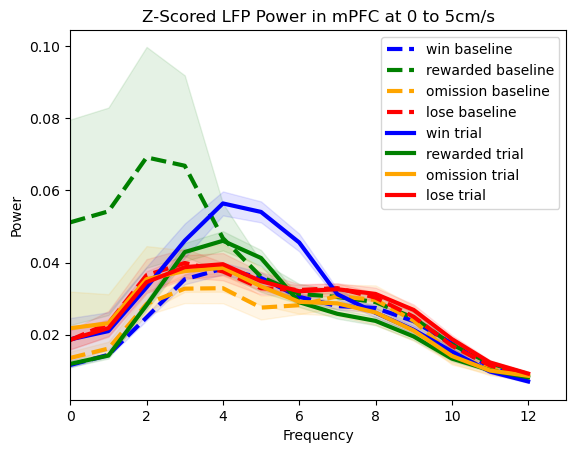

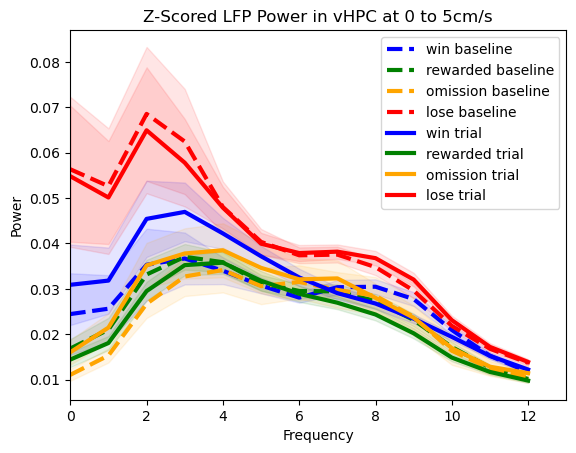

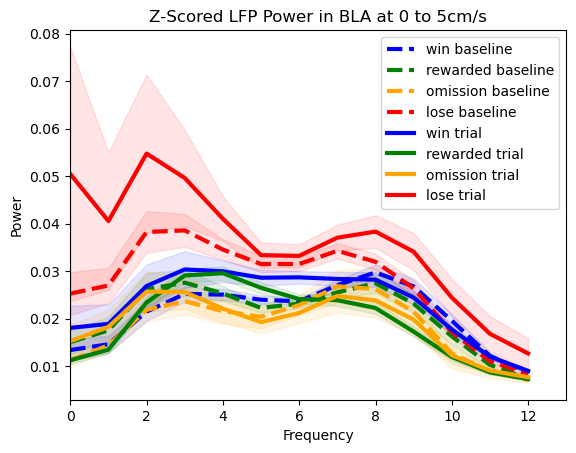

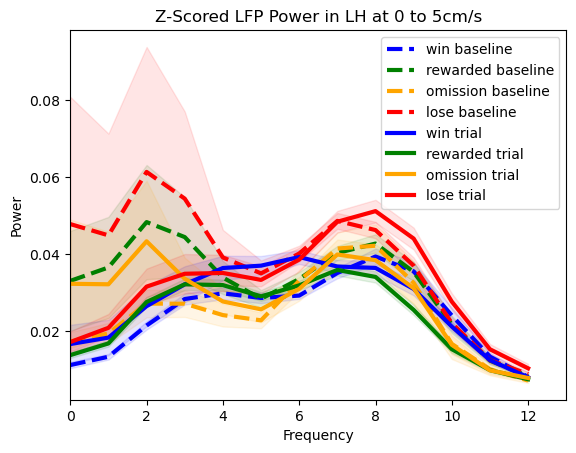

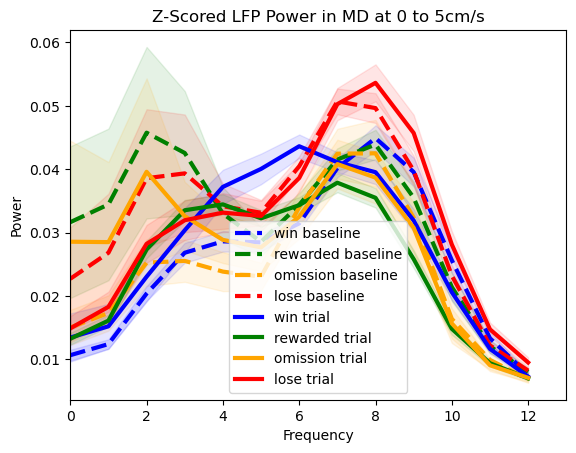

In [54]:
low_freq = 0
high_freq = 13
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power in {} at 0 to 5cm/s".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    # plt.yscale("log")
    # plt.ylim(0, 0.02)

    for trial_or_baseline, outcome in itertools.product(region_df["trial_or_baseline"].unique(), sorted(region_df["trial_outcome"].unique())[::-1]):
        outcome_df = region_df[(region_df["trial_or_baseline"] == trial_or_baseline) & (region_df["trial_outcome"] == outcome)]
        for index, row in outcome_df.iterrows():
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, trial_or_baseline), color=OUTCOME_TO_COLOR[outcome], \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    # plt.savefig("./proc/velocity_parsing/plot_region_line_trialoutcome_baselinetrial/\
    # rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[-1]))

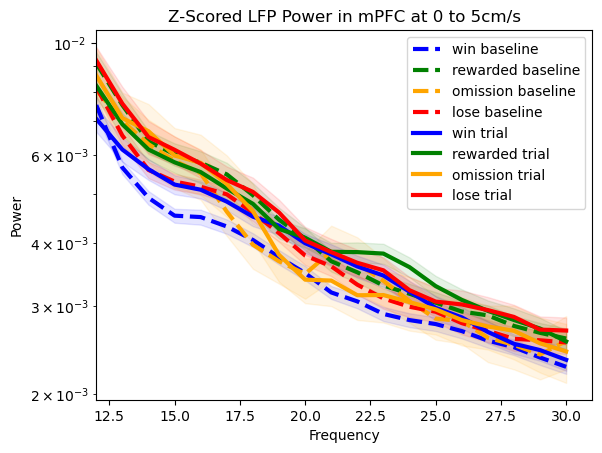

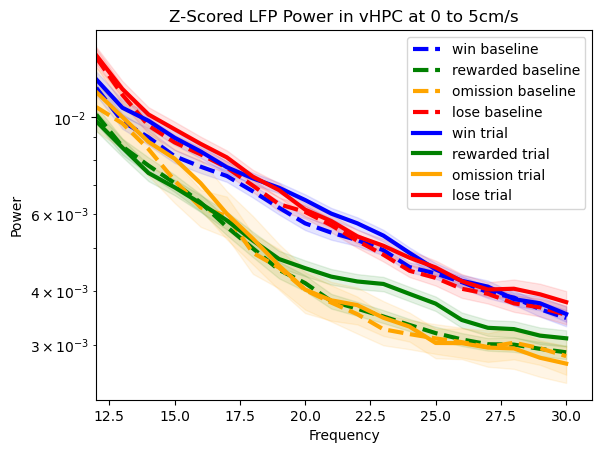

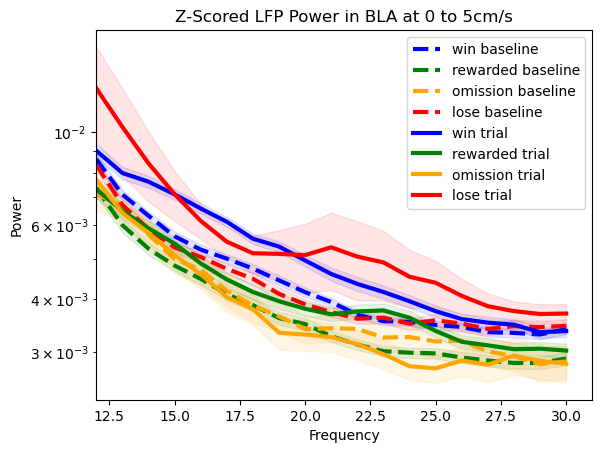

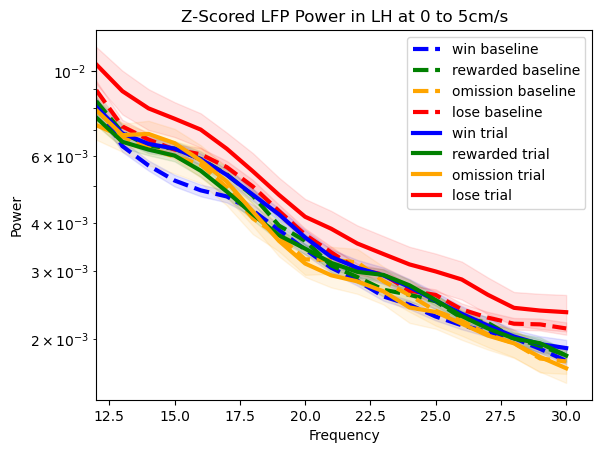

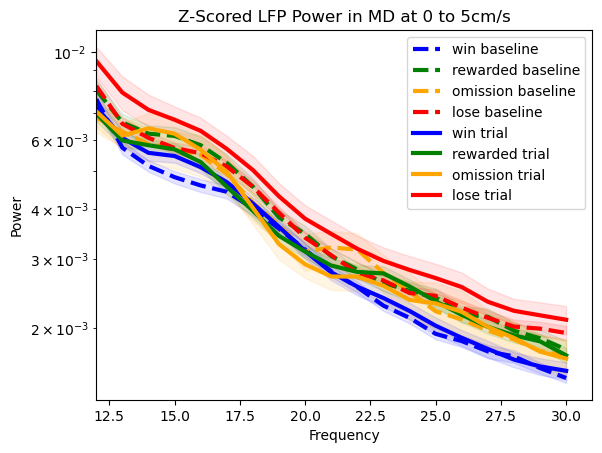

In [55]:
low_freq = 12
high_freq = 31
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power in {} at 0 to 5cm/s".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    plt.yscale("log")
    # plt.ylim(0, 0.02)

    for trial_or_baseline, outcome in itertools.product(region_df["trial_or_baseline"].unique(), sorted(region_df["trial_outcome"].unique())[::-1]):
        outcome_df = region_df[(region_df["trial_or_baseline"] == trial_or_baseline) & (region_df["trial_outcome"] == outcome)]
        for index, row in outcome_df.iterrows():
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, trial_or_baseline), color=OUTCOME_TO_COLOR[outcome], \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    # plt.savefig("./proc/velocity_parsing/plot_region_line_trialoutcome_baselinetrial/\
    # rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[-1]))

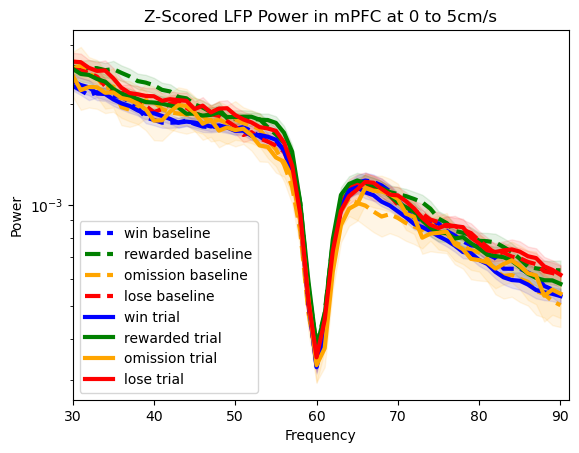

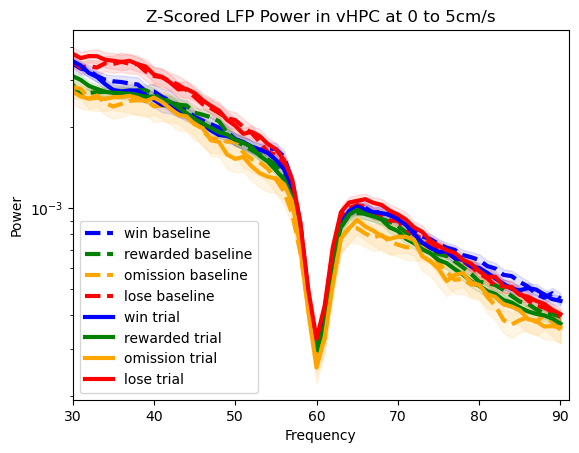

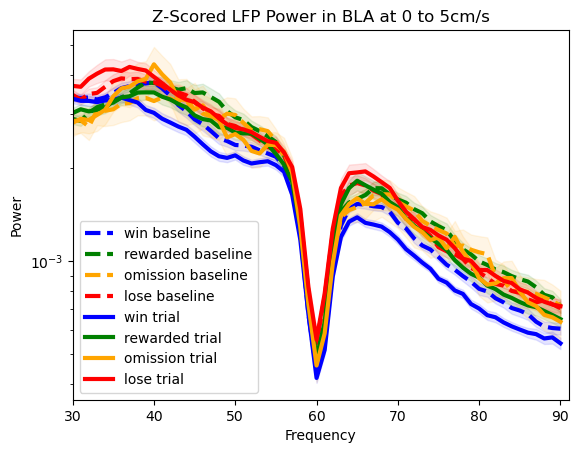

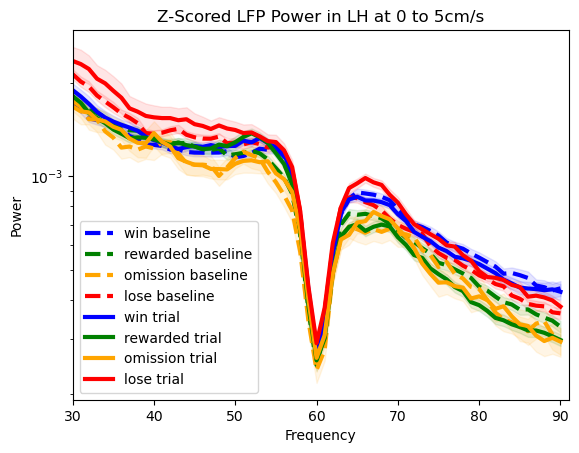

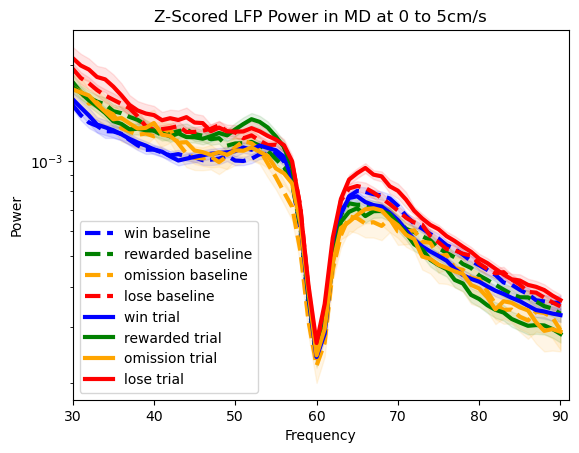

In [56]:
low_freq = 30
high_freq = 91
for region in grouped_all_trials_df["brain_region"].unique():
    region_df = grouped_all_trials_df[grouped_all_trials_df["brain_region"] == region]
    
    fig, ax = plt.subplots()
    plt.title("Z-Scored LFP Power in {} at 0 to 5cm/s".format(region.split("_")[-1]))
    plt.xlabel("Frequency")
    plt.ylabel("Power")
    plt.xlim(low_freq, high_freq) 
    plt.yscale("log")
    # plt.ylim(0, 0.02)

    for trial_or_baseline, outcome in itertools.product(region_df["trial_or_baseline"].unique(), sorted(region_df["trial_outcome"].unique())[::-1]):
        outcome_df = region_df[(region_df["trial_or_baseline"] == trial_or_baseline) & (region_df["trial_outcome"] == outcome)]
        for index, row in outcome_df.iterrows():
            current_frequencies = all_frequencies[low_freq: high_freq]
            mean_power = row["mean_power"][low_freq: high_freq]
            sem_power = row["sem_power"][low_freq: high_freq]
            try:
                ax = sns.lineplot(x=current_frequencies, y=mean_power, \
                label="{} {}".format(outcome, trial_or_baseline), color=OUTCOME_TO_COLOR[outcome], \
                linestyle=TRIAL_OR_BASELINE_TO_STYLE[trial_or_baseline], linewidth=3)
                
                plt.fill_between(current_frequencies, 
                mean_power - sem_power, mean_power + sem_power, \
                alpha=0.1, color=OUTCOME_TO_COLOR[outcome])
            
            except Exception as e: 
                print(e)
                continue
    plt.legend()
    # plt.savefig("./proc/velocity_parsing/plot_region_line_trialoutcome_baselinetrial/\
    # rce_lower_velocity_lfp_power_trialoutcome_baselinetrial_freq_{}_to_{}_region_{}.png".format(low_freq, high_freq, region.split("_")[-1]))

# Exporting that data

In [67]:
MERGED_LFP_AND_SLEAP["BLA_baseline_frequencies"]

0      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
1      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
2      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
3      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
4      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
                             ...                        
273    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
274    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
275    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
276    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
277    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
Name: BLA_baseline_frequencies, Length: 278, dtype: object

In [72]:
exported_lfp_and_sleap = MERGED_LFP_AND_SLEAP.drop(columns=trace_columns, errors="ignore").copy()
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "multitaper" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "thorax_velocity" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "frequencies" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "chunked_power" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "connectivity" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "spike_interface" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "index" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "stamp" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "box" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "height" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "width" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "ratio" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=[col for col in exported_lfp_and_sleap if "width" in col], errors="ignore")
exported_lfp_and_sleap = exported_lfp_and_sleap.drop(columns=['individual_subj',
 'all_subj',
 'recording_name',
 'track_names',
 'subject_id',
 'corner_path',
 'corner_parts',
 'rescaled_locations',
 'reward_port'], errors="ignore")

In [73]:
exported_lfp_and_sleap["frequencies"] = [MERGED_LFP_AND_SLEAP["BLA_baseline_frequencies"].iloc[0] for _ in range(len(exported_lfp_and_sleap))] 

In [74]:
exported_lfp_and_sleap = pd.melt(exported_lfp_and_sleap, value_vars=chunk_averaged_power_columns, value_name="power", id_vars=[col for col in exported_lfp_and_sleap.columns if col not in chunk_averaged_power_columns], var_name="region_and_baseline_or_trial")



In [75]:
exported_lfp_and_sleap["brain_region"] = exported_lfp_and_sleap["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[0].strip())

In [76]:
exported_lfp_and_sleap["trial_or_baseline"] = exported_lfp_and_sleap["region_and_baseline_or_trial"].apply(lambda x: x.split("_")[1].strip())

In [77]:
exported_lfp_and_sleap.head()

,time,recording_file,video_number,current_subject,recording_dir,video_file,video_frame,subject_info,competition_closeness,video_name,...,file_path,start_frame,stop_frame,binned_trial_velocity_mask,binned_baseline_velocity_mask,frequencies,region_and_baseline_or_trial,power,brain_region,trial_or_baseline
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,28574,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,/scratch/back_up/reward_competition_extention/...,27500,73601,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0, 1, 2, 3, 7, 8, 9]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",mPFC_baseline_chunk_averaged_power,"[0.017318686350549704, 0.017925108995122865, 0...",mPFC,baseline
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,30569,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,/scratch/back_up/reward_competition_extention/...,27500,73601,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0, 1, 2, 3, 4, 8, 9]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",mPFC_baseline_chunk_averaged_power,"[0.01853474256859947, 0.015384726150753536, 0....",mPFC,baseline
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,32813,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,/scratch/back_up/reward_competition_extention/...,27500,73601,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",mPFC_baseline_chunk_averaged_power,"[0.007134191529938478, 0.006392289072427898, 0...",mPFC,baseline
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,34807,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,/scratch/back_up/reward_competition_extention/...,27500,73601,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",mPFC_baseline_chunk_averaged_power,"[0.010258115187514464, 0.011331408396173432, 0...",mPFC,baseline
4,37450494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,36677,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,/scratch/back_up/reward_competition_extention/...,27500,73601,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",mPFC_baseline_chunk_averaged_power,"[0.019959905710863316, 0.021502577684238623, 0...",mPFC,baseline


In [78]:
exported_lfp_and_sleap["all_theta_power"] = exported_lfp_and_sleap["power"].apply(lambda x: x[4:13])
exported_lfp_and_sleap["all_beta_power"] = exported_lfp_and_sleap["power"].apply(lambda x: x[13:30])
exported_lfp_and_sleap["all_gamma_power"] = exported_lfp_and_sleap["power"].apply(lambda x: x[30:90])
exported_lfp_and_sleap["mean_theta_power"] = exported_lfp_and_sleap["all_theta_power"].apply(lambda x: x.mean())
exported_lfp_and_sleap["mean_beta_power"] = exported_lfp_and_sleap["all_beta_power"].apply(lambda x: x.mean())
exported_lfp_and_sleap["mean_gamma_power"] = exported_lfp_and_sleap["all_gamma_power"].apply(lambda x: x.mean())

In [79]:
exported_lfp_and_sleap.head()

,time,recording_file,video_number,current_subject,recording_dir,video_file,video_frame,subject_info,competition_closeness,video_name,...,region_and_baseline_or_trial,power,brain_region,trial_or_baseline,all_theta_power,all_beta_power,all_gamma_power,mean_theta_power,mean_beta_power,mean_gamma_power
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,28574,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_baseline_chunk_averaged_power,"[0.017318686350549704, 0.017925108995122865, 0...",mPFC,baseline,"[0.05323456300810262, 0.040785350539367514, 0....","[0.005178806816233346, 0.004624298467192566, 0...","[0.003008514317054923, 0.0021627048323863652, ...",0.023359,0.002830,0.001184
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,30569,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_baseline_chunk_averaged_power,"[0.01853474256859947, 0.015384726150753536, 0....",mPFC,baseline,"[0.053904049162800796, 0.04361157259099613, 0....","[0.006680609526504295, 0.00508040359602738, 0....","[0.0017409224032708776, 0.001770923484776478, ...",0.023159,0.002916,0.001199
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,32813,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_baseline_chunk_averaged_power,"[0.007134191529938478, 0.006392289072427898, 0...",mPFC,baseline,"[0.0741197642569346, 0.0701637723463791, 0.028...","[0.003001331593495176, 0.0025698787793671544, ...","[0.0011483866641384072, 0.0013849141393171705,...",0.025181,0.002251,0.001016
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,34807,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_baseline_chunk_averaged_power,"[0.010258115187514464, 0.011331408396173432, 0...",mPFC,baseline,"[0.07644190873284526, 0.06974486102715169, 0.0...","[0.004350933110387718, 0.004188942487310952, 0...","[0.0021401599593008887, 0.0019674899194577636,...",0.026754,0.002537,0.000988
4,37450494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,36677,6_1_top_1_base_2_vs_6_3,win_non_comp,20221214_125409_om_and_comp_6_1_and_6_3.1,...,mPFC_baseline_chunk_averaged_power,"[0.019959905710863316, 0.021502577684238623, 0...",mPFC,baseline,"[0.06290124727701688, 0.06400907221468191, 0.0...","[0.005964111442823339, 0.005299721284623175, 0...","[0.001837081902945919, 0.0016866411133440863, ...",0.025561,0.003721,0.001088


In [80]:
exported_lfp_and_sleap.to_pickle("./proc/rce_1_sec_interval_lfp_power_spectra_and_velocity.pkl")

In [82]:
exported_lfp_and_sleap["frequencies"]

0       [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
1       [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
2       [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
3       [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
4       [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
                              ...                        
2775    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
2776    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
2777    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
2778    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
2779    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
Name: frequencies, Length: 2780, dtype: object